In [3]:
import pandas as pd
import numpy as np

In [5]:
import os
os.chdir('/Users/zeng/Desktop/project/role_singlecell/codes/reproduce/')
from dtg_utils import *
from draw_1_hop import *

### Human glioblastoma

In [9]:
glioblastoma_embedding = pd.read_csv('../../results/data/singleCell/glioblastoma/0_12_hours.emb',
                                    sep=' ',
                                    skiprows=1,
                                    header=None,
                                    index_col=0)
glioblastoma_index = pd.read_csv('../../results/data/singleCell/glioblastoma/splitMatrix/index_tracker.tsv',
                                sep='\t')
glioblastoma_index.head(5)

,Unnamed: 0,0h,t12
0,AL627309.1,1,1983
1,LINC00115,2,1984
2,LINC02593,3,1985
3,SAMD11,4,1986
4,HES4,5,1987


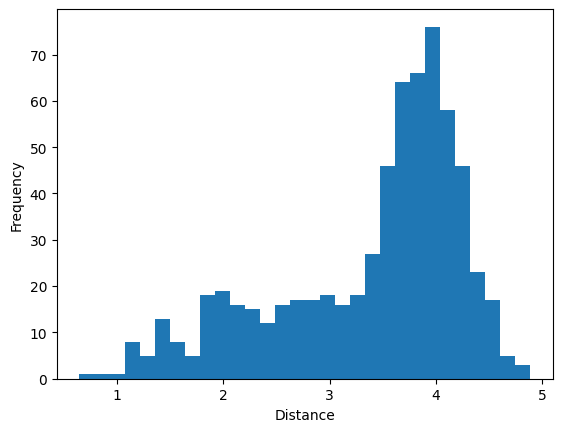

In [10]:
glioblastoma_distance = cal_node_distances(glioblastoma_index, glioblastoma_embedding)

#### output the distances for visualization 

In [11]:
glioblastoma_distance.to_csv('../../results/single_cell/glioblastoma/glb_eeisp_distance.csv', 
                             sep='\t',
                             index=False)

#### plot the nodes with largest distance 

In [45]:
# read the orginal edgelist
glioblastoma_edgelist = '../../results/data/singleCell/glioblastoma/Exp2_1_2_merged.edgelist'
edgelist = pd.read_csv(pbmc_edgelist, sep='\t', header=None)
edgelist_list = edgelist.iloc[:, :2].stack().unique().tolist()

# save path
path = '/Users/xinzeng/Desktop/research/role_singlecell/results/single_cell/glioblastoma/'

In [47]:
id_list = glioblastoma_distance.iloc[:5, [0, 1, 2]].values.tolist()
for index_list in id_list:
    print(index_list[0])
    batch_plot_1_hop(glioblastoma_edgelist,index_list[1:],path,index_list[0], edgelist_list)

CD164
MAP1A
DKK3
CD44
LDHA


In [48]:
id_list = glioblastoma_distance.iloc[600:605, [0, 1, 2]].values.tolist()
print(id_list)
for index_list in id_list:
    batch_plot_1_hop(glioblastoma_edgelist,index_list[1:],path,index_list[0], edgelist_list)

[['CCDC18', 88, 2070], ['NUCKS1', 178, 2160], ['FBXO32', 925, 2907], ['KCNN3', 130, 2112], ['HMGB3', 1968, 3950]]
2160


In [67]:
egr = glioblastoma_distance[glioblastoma_distance['Unnamed: 0'] == 'GMNN'].values.tolist()[0]
egr
batch_plot_1_hop(glioblastoma_edgelist,egr[1:],path,egr[0], edgelist_list)

1.0116420114734415


### PBMC

In [68]:
NM_CD4_embedding = pd.read_csv('../../results/new_pairwise_exp/pbmc_rna/PBMC_CD4.emb',
                                    sep=' ',
                                    skiprows=1,
                                    header=None,
                                    index_col=0)
NM_CD4_index = pd.read_csv('../../results/new_pairwise_exp/pbmc_rna/splitMatrix/index_tracker.tsv',
                                sep='\t')
NM_CD4_index.head(5)

,Unnamed: 0,CD4.N,22_CD4.M
0,GNLY,1,2001
1,KLRB1,2,2002
2,NKG7,3,2003
3,CCL5,4,2004
4,ACTG1,5,2005


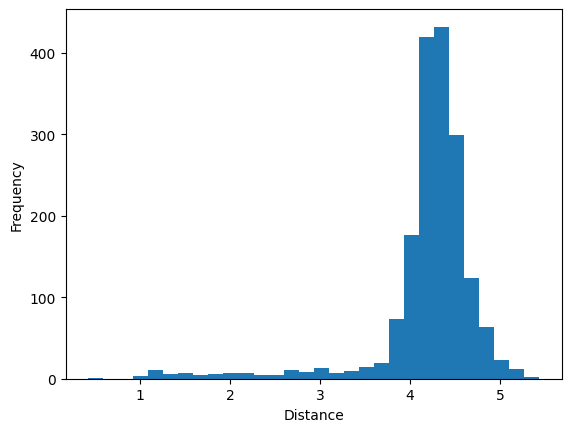

In [69]:
N_M_CD4_distance = cal_node_distances(NM_CD4_index, NM_CD4_embedding)

In [70]:
N_M_CD4_distance.to_csv('../../results/result2/pbmc_NM_CD4_distance.csv', sep='\t', index=False)
N_M_CD4_distance.head(5)

,Unnamed: 0,CD4.N,22_CD4.M,distance
617,CARD16,618,2618,5.431743
66,SAT1,67,2067,5.402437
869,PSTPIP2,870,2870,5.236638
754,GPRIN3,755,2755,5.176708
977,RRM1,978,2978,5.163019


In [71]:
pbmc_edgelist = '../../results/new_pairwise_exp/pbmc_rna/PBMC_CD4_merged.edgelist'
edgelist = pd.read_csv(pbmc_edgelist, sep='\t', header=None)
edgelist_list = edgelist.iloc[:, :2].stack().unique().tolist()
path = '/Users/xinzeng/Desktop/research/role_singlecell/results/result2/pbmc_pairs/'

In [21]:
id_list = N_M_CD4_distance.iloc[:10, [0, 1, 2]].values.tolist()

for index_list in id_list:
    batch_plot_1_hop(pbmc_edgelist,index_list[1:],path,index_list[0], edgelist_list)

In [72]:
egr = N_M_CD4_distance[N_M_CD4_distance['Unnamed: 0'] == 'SP140'].values.tolist()[0]
egr
batch_plot_1_hop(pbmc_edgelist,egr[1:],path,egr[0], edgelist_list)

1.0035137426233751


### BMMC

In [73]:
BMMC_embedding = pd.read_csv('../../results/new_pairwise_exp/bmmc_rna/GMP_CD14_Monocytes.emb',
                                    sep=' ',
                                    skiprows=1,
                                    header=None,
                                    index_col=0)
BMMC_index = pd.read_csv('../../results/new_pairwise_exp/bmmc_rna/splitMatrix/index_tracker.tsv',
                                sep='\t')
BMMC_index.head(5)

,Unnamed: 0,CD14.Mono,GMP
0,PRTN3,1,2001
1,ELANE,2,2002
2,CTSG,3,2003
3,IGLL1,4,2004
4,AZU1,5,2005


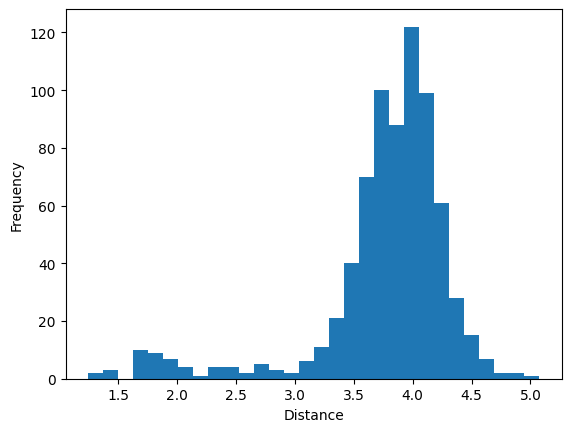

,Unnamed: 0,CD14.Mono,GMP,distance
381,ETS1,382,2382,5.073544
317,CENPM,318,2318,4.915838
1849,PSMD2,1850,3850,4.846493
1434,CKAP2,1435,3435,4.813484
983,HLA-DQA2,984,2984,4.725390


In [74]:
BMMC_distance = cal_node_distances(BMMC_index, BMMC_embedding)
BMMC_distance.head(5)

In [75]:
BMMC_distance.to_csv('../../results/result2/BMMC_distance.csv', sep='\t', index=False)

In [76]:
bmmc_edgelist = '../../results/new_pairwise_exp/bmmc_rna/GMP_CD14_Monocytes_merged.edgelist'
edgelist = pd.read_csv(bmmc_edgelist, sep='\t', header=None)
edgelist_list = edgelist.iloc[:, :2].stack().unique().tolist()
path = '/Users/xinzeng/Desktop/research/role_singlecell/results/result2/bmmc_pairs/'

In [26]:
id_list = BMMC_distance.iloc[:10, [0, 1, 2]].values.tolist()

for index_list in id_list:
    batch_plot_1_hop(bmmc_edgelist,index_list[1:],path,index_list[0], edgelist_list)

In [77]:
egr = BMMC_distance[BMMC_distance['Unnamed: 0'] == 'RASGEF1B'].values.tolist()[0]
egr
batch_plot_1_hop(bmmc_edgelist,egr[1:],path,egr[0], edgelist_list)

4.425027433298834


In [78]:
egr = BMMC_distance[BMMC_distance['Unnamed: 0'] == 'RETN'].values.tolist()[0]
egr
batch_plot_1_hop(bmmc_edgelist,egr[1:],path,egr[0], edgelist_list)

1.311459360812638
